In [33]:
import nilearn.plotting as nplt
%matplotlib inline

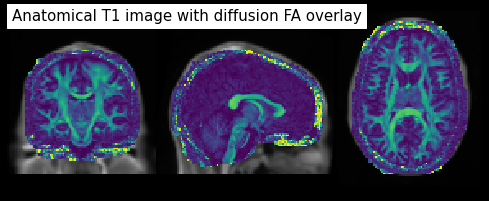

In [42]:
import os.path as p
data_path = "/mnt/c/src/connectomemapper3/cmp_report_brainhack_sample"
anat_file = "sub-103818_ses-01_space-DWI_desc-head_T1w.nii.gz"
diff_data = "sub-103818_ses-01_model-DTI_FA.nii.gz"
title = "Anatomical T1 image with diffusion FA overlay"
display = nplt.plot_anat(p.join(data_path, anat_file), 
          title=title,
          display_mode='ortho', dim=0, draw_cross=False, annotate=False)
display.add_overlay(p.join(data_path, diff_data))

In [61]:
from nipype.interfaces.base import BaseInterface, TraitedSpec, File, traits, Directory, CommandLine, BaseInterfaceInputSpec
import numpy as np

class overlayAnatDiffQC_InputSpec(BaseInterfaceInputSpec):
    anat_file = File(exists=True)
    dwi_fa_file = File(exists=True)
    out_anat_dwi_plot = File(exists=False)


class overlayAnatDiffQC_OutputSpec(TraitedSpec):
    out_anat_dwi_plot = File(exists=True)


class overlayAnatDiffQC(BaseInterface):
    """Produce an anatomical T1 image with diffusion FA overlay

    .. note::
        Note used.
    """
    input_spec = overlayAnatDiffQC_InputSpec
    output_spec = overlayAnatDiffQC_OutputSpec
    title = "Anatomical T1 image with diffusion FA overlay"

    def _run_interface(self,runtime):
        nplt.plot_anat(self.inputs.anat_file, 
          title=title,
          display_mode='ortho', dim=0, draw_cross=False, annotate=False)
        display.add_overlay(self.inputs.dwi_fa_file)
        display.savefig(self.inputs.out_anat_dwi_plot)
        display.close()
        return runtime
    
    def _list_outputs(self):
        outputs = self._outputs().get()
        nplt.plot_anat(self.inputs.anat_file, 
          title=title,
          display_mode='ortho', dim=0, draw_cross=False, annotate=False)
        display.add_overlay(self.inputs.dwi_fa_file)
        display.savefig(self.inputs.out_anat_dwi_plot)
        display.close()
        
        outputs["out_anat_dwi_plot"] = self.inputs.out_anat_dwi_plot
        return outputs
    


In [133]:
class carpetPlot_InputSpec(BaseInterfaceInputSpec):
    timeseries_npy = File(exists=True)
    out_carpet_plot = File(exists=False)


class carpetPlot_OutputSpec(TraitedSpec):
    out_carpet_plot = File(exists=True)


class carpetPlot(BaseInterface):
    """Produce a carpet plot for artifact correction.

    .. note::
        Note used.
    """
    input_spec = carpetPlot_InputSpec
    output_spec = carpetPlot_OutputSpec
    
    def _carpet_plot(self):
        timeseries = np.load(self.inputs.timeseries_npy)
        figsize = (10, 10)
        figure = plt.figure(figsize=figsize)
        axes = figure.add_subplot(1, 1, 1)
        axes.set_xlabel("ROI")
        axes.set_ylabel("Time sample")
        m = axes.imshow(timeseries, interpolation = "nearest", cmap = "magma");
        plt.colorbar(m, shrink = 0.1);

        plt.savefig(self.inputs.out_carpet_plot)
        plt.close()
    
    def _run_interface(self,runtime):
        self._carpet_plot()
        return runtime
    
    def _list_outputs(self):
        outputs = self._outputs().get()        
        self._carpet_plot()
        
        outputs["out_carpet_plot"] = self.inputs.out_carpet_plot
        return outputs

In [57]:
from nipype import Workflow, Node
plotAnatDWIQC = Node(overlayAnatDiffQC(anat_file = p.join(data_path, anat_file), 
                                       dwi_fa_file = p.join(data_path, diff_data),
                                      out_anat_dwi_plot = p.join(data_path, "out_anat_dwi_plot.png")),
                     name = "overlayAnatDiffQC")
plotAnatDWIQC.run()

211204-14:48:19,192 nipype.workflow INFO:
	 [Node] Setting-up "overlayAnatDiffQC" in "/tmp/tmpb65tywr9/overlayAnatDiffQC".
211204-14:48:19,452 nipype.workflow INFO:
	 [Node] Running "overlayAnatDiffQC" ("__main__.overlayAnatDiffQC")
211204-14:48:26,289 nipype.workflow INFO:
	 [Node] Finished "overlayAnatDiffQC".


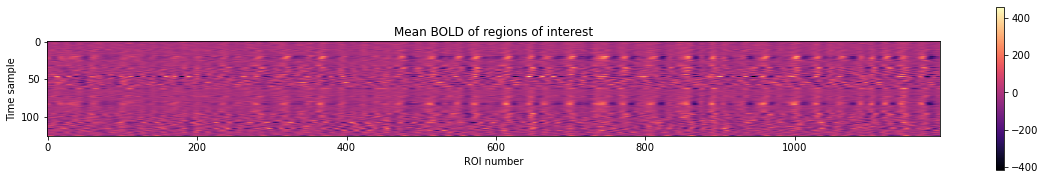

In [120]:
import matplotlib.pyplot as plt
figsize = (20, 30)
figure = plt.figure(figsize=figsize)
axes = figure.add_subplot(1, 1, 1)
axes.set_xlabel("ROI number")
axes.set_ylabel("Time sample")
axes.set_title("Mean BOLD of regions of interest")

timeseries_centered = (timeseries.T - np.mean(timeseries, axis = 1)).T

m = axes.imshow(timeseries_centered, interpolation = "nearest", cmap = "magma");
plt.colorbar(m, shrink = 0.1);

In [134]:
timeseries_npy = "sub-103818_ses-01_atlas-L2018_res-scale1_timeseries.npy"
carpetPlotter = Node(carpetPlot(timeseries_npy = p.join(data_path, timeseries_npy),
                                out_carpet_plot = p.join(data_path, "out_carpet_plot.png")),
                     name = "carpetPlot")
carpetPlotter.run()

211204-16:32:03,678 nipype.workflow INFO:
	 [Node] Setting-up "carpetPlot" in "/tmp/tmpztw8_2bf/carpetPlot".
211204-16:32:03,819 nipype.workflow INFO:
	 [Node] Running "carpetPlot" ("__main__.carpetPlot")
211204-16:32:09,239 nipype.workflow INFO:
	 [Node] Finished "carpetPlot".


In [86]:
import nibabel as nib
timeseries = np.load(p.join(data_path, timeseries_npy))
timeseries.reshape((timeseries.shape[0], 1, 1, timeseries.shape[1]))
ni = nib.Nifti1Image(timeseries, np.eye(4))

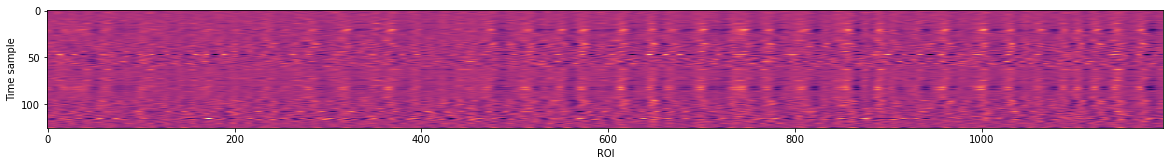

In [94]:
import matplotlib.pyplot as plt
figsize = (20, 20)
figure = plt.figure(figsize=figsize)
axes = figure.add_subplot(1, 1, 1)
axes.set_xlabel("ROI")
axes.set_ylabel("Time sample")
axes.imshow(timeseries, interpolation = "nearest", cmap = "magma");